In [3]:
from xmltodict import parse
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np

c:\Users\ozden\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
a = pd.read_csv('./Roma/reviews.csv')
a

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking..."
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ..."
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt..."
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional..."
...,...,...,...,...,...,...
1229192,706364021561816308,711373516618902584,2022-09-08,348540159,Aurelie,"Endroit très calme, beau et un accueil très ch..."
1229193,706368632054192826,711400577972053122,2022-09-08,36852987,Philipp,Die Kommunikation mit Danilo verlief reibungsl...
1229194,706549325055926003,712081657753454508,2022-09-09,261132482,Luis,Todo perfecto! Luca es muy amable y buen anfit...
1229195,706549325055926003,713601963424948343,2022-09-11,392955273,Luigi,Mi sono trovato benissimo sin da subito nell'a...


In [7]:
roma_list = pd.read_csv('./Roma/listings.csv')
roma_list

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,Tranquillità immersa nel verde con due laghi m...,https://a0.muscache.com/pictures/68d7eb8c-e5b6...,68534156,...,4.85,4.65,4.80,NaN,f,2,0,2,0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,...,4.53,4.40,4.20,NaN,t,1,1,0,0,1.64
3,2903,https://www.airbnb.com/rooms/2903,20220911230914,2022-09-12,city scrape,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,NaN,https://a0.muscache.com/pictures/6315103/3f4d3...,3280,...,4.70,4.74,4.48,NaN,f,3,0,3,0,0.33
4,104339,https://www.airbnb.com/rooms/104339,20220911230914,2022-09-12,previous scrape,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...","Il quartiere ""San Paolo"" è parte integrante de...",https://a0.muscache.com/pictures/739258/4146f6...,543054,...,5.00,4.83,4.83,NaN,f,3,1,2,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,28042301,https://www.airbnb.com/rooms/28042301,20220911230914,2022-09-12,city scrape,Bright apartment close to the seaside.,Apartment on the 2nd floor with a large and ve...,Very close to food shops and restaurants and o...,https://a0.muscache.com/pictures/5f242f57-b704...,211821938,...,4.88,4.82,4.65,NaN,t,1,1,0,0,0.35
24778,41256298,https://www.airbnb.com/rooms/41256298,20220911230914,2022-09-12,city scrape,Nativo Suite Da Vinci 25,Nativo Lodge è una realtà che si occupa di aff...,"Located in Rome, within 19 km of PalaLottomati...",https://a0.muscache.com/pictures/0ecdfded-2ff1...,252978577,...,5.00,5.00,5.00,NaN,t,2,2,0,0,0.04
24779,15476977,https://www.airbnb.com/rooms/15476977,20220911230914,2022-09-12,city scrape,"Deluxe Doble Room,Bathtub",The room is located within an apartment on the...,"Located in Fiumicino, within the complex of Pa...",https://a0.muscache.com/pictures/fb1b5ce1-9e35...,95809238,...,NaN,NaN,NaN,NaN,t,8,2,6,0,NaN
24780,42446790,https://www.airbnb.com/rooms/42446790,20220911230914,2022-09-12,city scrape,Night in the wood,Immersi nella natura e a contatto con gli anim...,NaN,https://a0.muscache.com/pictures/b1c79762-f024...,2214620,...,5.00,4.33,4.67,NaN,t,2,0,2,0,0.12


In [75]:
roma_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [68]:
roma_list[["reviews_per_month"]]

,reviews_per_month
0,3.22
1,0.07
2,1.64
3,0.33
4,0.05
...,...
24777,0.35
24778,0.04
24779,NaN
24780,0.12


In [67]:
roma_list["reviews_per_month"].unique()

array([3.220e+00, 7.000e-02, 1.640e+00, 3.300e-01, 5.000e-02, 1.500e-01,
       1.140e+00, 3.000e-01, 2.000e-02, 4.000e-01, 1.310e+00, 3.100e-01,
       4.000e-02, 6.700e-01, 3.600e-01, 7.700e-01, 4.490e+00, 3.400e-01,
       4.900e-01, 4.300e-01, 6.000e-01, 3.170e+00, 1.000e-01, 1.520e+00,
             nan, 2.170e+00, 8.000e-02, 4.700e-01, 1.040e+00, 3.000e-02,
       1.870e+00, 2.250e+00, 2.300e-01, 1.920e+00, 2.700e-01, 1.110e+00,
       1.400e-01, 1.010e+00, 1.600e-01, 9.000e-02, 2.500e+00, 4.400e-01,
       6.400e-01, 9.100e-01, 2.750e+00, 1.330e+00, 1.900e-01, 7.000e-01,
       1.610e+00, 1.720e+00, 3.750e+00, 2.800e-01, 2.200e-01, 1.280e+00,
       4.800e-01, 9.200e-01, 1.590e+00, 2.360e+00, 6.000e-02, 1.660e+00,
       1.840e+00, 3.800e-01, 2.500e-01, 1.290e+00, 1.760e+00, 3.500e-01,
       2.000e-01, 1.560e+00, 8.100e-01, 5.000e+00, 1.400e+00, 1.060e+00,
       1.380e+00, 1.000e-02, 2.910e+00, 2.340e+00, 2.140e+00, 2.000e+00,
       6.600e-01, 1.200e+00, 1.440e+00, 8.900e-01, 

In [74]:
pd.set_option('display.max_columns', 100)
roma_cleaned = roma_list[["id","listing_url","name","description","host_id","host_name","host_response_time","host_response_rate","host_is_superhost","latitude","longitude","property_type","room_type","accommodates","bathrooms_text","bedrooms","beds","amenities","price","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","instant_bookable","reviews_per_month"]]
roma_cleaned.head(5)

,id,listing_url,name,description,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,68534156,Cristina,within a few hours,100%,t,41.78984,12.60899,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",$45.00,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,f,3.22
1,2737,https://www.airbnb.com/rooms/2737,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,3047,Elif,within a few hours,99%,f,41.87136,12.48215,Private room,Private room,1,1.5 baths,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",$50.00,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,f,0.07
2,103870,https://www.airbnb.com/rooms/103870,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,535822,Fabrizio,within an hour,100%,f,41.89711,12.50423,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",$78.00,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,t,1.64
3,2903,https://www.airbnb.com/rooms/2903,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,3280,Andrea,within a day,56%,f,41.88824,12.46953,Private room in bed and breakfast,Private room,4,1 bath,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating...",$164.00,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,f,0.33
4,104339,https://www.airbnb.com/rooms/104339,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...",543054,Giuseppe,NaN,NaN,f,41.85585,12.48361,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",$80.00,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,f,0.05


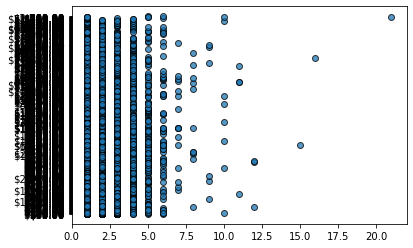

In [82]:
plt.scatter(roma_cleaned["bedrooms"],roma_cleaned["price"], edgecolor='black', linewidth=1, alpha=0.75)
